In [1]:
import sys

assert sys.version_info >= (3,7)
# assert apenas verifica se a condição é verdadeira

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__)>=version.parse("1.0.1")

In [3]:
import matplotlib.pyplot as plt
plt.rc('font', size=14)
plt.rc("axes", labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)

In [4]:
from pathlib import Path

IMAGES_PATH = Path()/'images'/'classification'
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension='png', resolution=300):
    path = IMAGES_PATH/f'{fig_id}.{fig_extension}'
    if tight_layout:
        # O plt otimiza o layout da imagem, evitando cortes
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)


__MNIST__

Scikit-Learn fornece alguns datasets populares 

* sklearn.datasets: É o módulo Scikit-learn que contém funções utilitárias para carregar, gerar e buscar conjuntos de dados (datasets) populares para tarefas de aprendizado de máquina.

* fetch_openml: Esta função é um wrapper (envolvedor) que permite baixar conjuntos de dados disponíveis no repositório OpenML, uma plataforma aberta para compartilhamento de dados e experimentos de machine learning.

In [5]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', as_frame=False)

In [6]:
mnist.DESCR

"**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  \n**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  \n**Please cite**:  \n\nThe MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  \n\nIt is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 

In [7]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [8]:
x_data, y_data = mnist.data, mnist.target

In [9]:
print(x_data.shape)
print(x_data)

(70000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [10]:
print(y_data.shape)
print(y_data)

(70000,)
['5' '0' '4' ... '4' '5' '6']


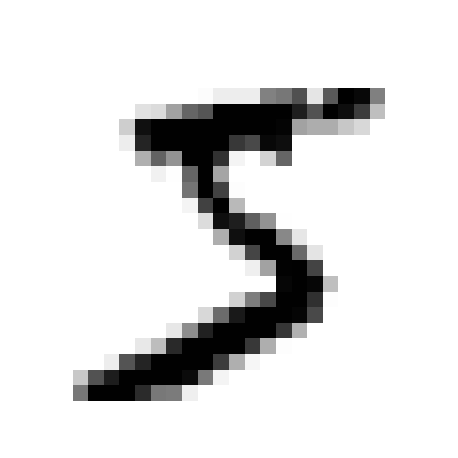

In [11]:
def plot_digit(image_data):
    image = image_data.reshape(28,28)
    # reshape transforma a imagem 1D (784) em 2D(28x28)
    plt.imshow(image, cmap='binary')
    plt.axis('off')

some_digit = x_data[0]
plot_digit(some_digit)
save_fig("somae_digit_plot")

In [12]:
y_data[0]

'5'

O conjunto ja vem divido em treino e test, para evitar detalhes de pre processamento. O conjunto foi criado para teste e aprendizado

In [13]:
X_train, Y_train, X_test, Y_test = x_data[:60000], y_data[:60000], x_data[60000:], y_data[60000:]

Aplicando um embaralhamento.
Algoritmos sensiveis a ordem (0,0,0,0,1,1,1,2,2,2,...) podem aprender vieses que nao existem, o embaralhamento evita essa sequencia ordenada que pode vir a acontecer.

Nem em todos os casos isso é o ideal, series temporais e dados de mercados de ações sao sensiveis a ordenação.

In [14]:
import numpy as np
shuffle_index = np.random.permutation(60000)

X_train, Y_train = X_train[shuffle_index], Y_train[shuffle_index]

### Problema simplificado __Classificador Binario SGDClassifier__


In [15]:
Y_test_5 = (Y_test == '5')
Y_train_5 = (Y_train == '5')

print(f'Existem no total {Y_test_5.sum()} numeros 5 no conjunto teste')


Existem no total 892 numeros 5 no conjunto teste


In [16]:
y_equal_5 = (y_data == '5')
print(f'Existem no total {y_equal_5.sum()} numeros 5 no dataset, aproximadamente 10%')


Existem no total 6313 numeros 5 no dataset, aproximadamente 10%


O classificador escolhido foi o __Classificador de Gradiente Descendente Estócatico (SGDClassifier)__

O SGDClassifier é um algoritmo de aprendizado de máquina implementado no scikit-learn que treina modelos lineares usando Gradiente Descendente Estocástico (Stochastic Gradient Descent – SGD).

Ele é útil para grandes bases de dados e problemas de alta dimensionalidade, pois é eficiente e escalável em comparação com métodos exatos, como a Regressão Logística via métodos de otimização clássicos.

O treinamento ocorre de forma iterativa, ajustando os parâmetros do modelo passo a passo:

Inicialização dos pesos (normalmente próximos de zero).

Em cada iteração:

Um exemplo (ou um pequeno lote de exemplos) é escolhido aleatoriamente.

O gradiente do erro é calculado em relação a esse exemplo.

Os pesos são atualizados usando a regra:

𝑤
←
𝑤
−
𝜂
⋅
∇
𝐿
(
𝑤
;
𝑥
𝑖
,
𝑦
𝑖
)
w←w−η⋅∇L(w;x
i
,y
i	​
)

onde:

w = vetor de pesos (parâmetros do modelo)

η = taxa de aprendizado (learning rate)

∇L = gradiente da função de perda em relação aos parâmetros

(
𝑥
𝑖
,
𝑦
𝑖
)
 = exemplo de treino escolhido

O processo continua até a convergência ou até atingir um número máximo de épocas (iterações sobre o dataset).

In [17]:
from sklearn.linear_model import SGDClassifier
sgd_clf = SGDClassifier()
sgd_clf.fit(X_train,Y_train_5)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [18]:
sgd_clf.predict([some_digit])

array([False])

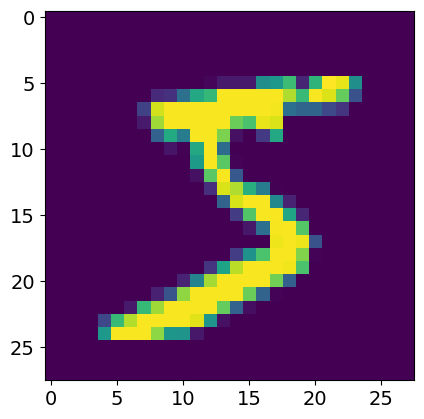

In [19]:
image = some_digit.reshape(28,28)
plt.imshow(image)

Implementado um cross validation para verificação

In [20]:
from sklearn.model_selection import StratifiedKFold
# clone permite criar uma copia nao treina do classificador
from sklearn.base import clone

skfolds = StratifiedKFold(n_splits=3)

for train_index, test_index in skfolds.split(X_train, Y_train_5):
        clone_clf = clone(sgd_clf)
        X_train_folds = X_train[train_index]
        Y_train_folds = Y_train_5[train_index]
        X_test_folds = X_train[test_index]
        Y_test_folds = Y_train_5[test_index]

        clone_clf.fit(X_train_folds, Y_train_folds)
        y_predict = clone_clf.predict(X_test_folds)
        n_correct = sum(y_predict == Y_test_folds)
        print(n_correct/len(y_predict))

0.96525
0.9608
0.96485


O caso acima nao é realmente bom, pode-se dizer que o modelo aprendeu a __reconhecer os valores diferentes de 5__ devido ao desbalanceamento dos dados.

Marcar um valor como nao 5 sendo que ele é nao cinco é um ACERTO

In [21]:
from sklearn.model_selection import cross_val_score

cross_val_score(sgd_clf, X_train, Y_train_5, cv=3, scoring="accuracy")

array([0.95375, 0.96635, 0.96135])

Classificador de nâo 5

In [22]:
from sklearn.base import BaseEstimator

class Never5Classifier(BaseEstimator):
    def fit(self, X, y=None):
        return self
    def predict(self,X):
        return np.zeros((len(X),1), dtype=bool)

In [23]:
import numpy as np
np.zeros((5,1), dtype=bool)

array([[False],
       [False],
       [False],
       [False],
       [False]])

O classificador nao aprende nada com fit e retorna uma predição do tipo [false, false, false, false, false, false, false, false]

E aplica a predição aos dados originais:
* Original = [false, false, false, true, false, true, false, false, false, false, false, false, false, false]
* Predito =  [false, false, false, false, false, false, false, false, false, false, false, false, false, false]
* Acertos = [acerto, acerto, acerto, erro, acerto, erro, acerto, acerto, acerto, acerto, acerto, acerto, acerto, acerto], acertou 12 em 14 e isso é 85% de acerto

Um classificador inutil obtem 85% de acerto sem fazer nada, isso ocorre devido a grande variancia dos dados

In [24]:
never_5_clf = Never5Classifier()
cross_val_score(never_5_clf, X_train, Y_train_5, cv=3, scoring="accuracy")

array([0.9068 , 0.90915, 0.913  ])

Isso mostra que um classificador inutil de nao é cinco possui alta taxa de sucesso, indicando que o conjunto de dados possui baixa quantidade de numeros 5 em relação ao total

__Matriz de Confusao__

Mostra os erros ocorridos durante o precessamento dos dados

In [25]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=5)

In [26]:
from sklearn.metrics import confusion_matrix

confusion_matrix(Y_train_5, y_train_pred)

array([[53629,   950],
       [ 1372,  4049]])

In [27]:
acuracia = (51898+4429)/(2681+4429+992+51898)

acuracia

0.9387833333333333

A primeira linha indica a classe falsa, nao cinco:
 * o primeiro elemento sao os verdadeiros negativos, valores que nao sao cinco classificados corretamente
 * o segundo elemento sao os erros, nao cinco classificados como 5, falso positivos

A segunda linha é a classe verdadeiro, cinco:
 * o primeiro elemento sao os falsos positivos, cinco classificado como nao cinco
 * o segundo elemento sao os valores verdadeiros, cinco classficados como cinco

$$
\text{Acuracia} = \frac{a11 + a22}{a11 + a22 + a12 + a21}
$$
$$
\text{Precisão} = \frac{a22}{a22 + a12}
$$
$$
\text{Revogação} = \frac{a22}{a22 + a21}
$$



Matriz de Confusão (classificador perfeito):

| Classe Real \ Prevista | Negativo | Positivo |
|-------------------------|----------|----------|
| **Negativo**           | 53000    | 0        |
| **Positivo**           | 0        | 53000    |


__Metricas__

Precisão e Revogação

In [28]:
from sklearn.metrics import precision_score, recall_score

# Acuracia: 3834/(3834 + 910)
print(precision_score(Y_train_5, y_train_pred))
# Apenas 80% dos positivos sao de fato o valo 5

# Revocação: 3834/(3834 + 1587)
print(recall_score(Y_train_5, y_train_pred))
# O modelo identificou 70% dos valores 5

0.8099619923984797
0.7469101641763513


# 📊 F1-Score (Média Harmônica)

O **F1-score** é uma métrica de avaliação de classificadores que combina **Precisão** e **Revogação** em uma única medida.  
Ele é a **média harmônica** entre as duas métricas.

---

## 🔹 Definições

- **Precisão (Precision):**

$$
\text{Precisão} = \frac{VP}{VP + FP}
$$

- **Revogação (Recall / Sensibilidade):**

$$
\text{Revogação} = \frac{VP}{VP + FN}
$$

---

## 🔹 Fórmula do F1-score

$$
F_1 = 2 \cdot \frac{\text{Precisão} \cdot \text{Revogação}}{\text{Precisão} + \text{Revogação}}
$$

---

## 🔹 Exemplo de Matriz de Confusão

| Classe Real \ Prevista | Negativo | Positivo |
|-------------------------|----------|----------|
| **Negativo**           | 50 (VN)  | 10 (FP)  |
| **Positivo**           | 5 (FN)   | 35 (VP)  |

---

## 🔹 Cálculos

- Precisão:

$$
\text{Precisão} = \frac{35}{35 + 10} = 0.778
$$

- Revogação:

$$
\text{Revogação} = \frac{35}{35 + 5} = 0.875
$$

- F1-score:

$$
F_1 = 2 \cdot \frac{0.778 \cdot 0.875}{0.778 + 0.875} \approx 0.823
$$

---

✅ O **F1-score** é alto apenas quando **Precisão e Revogação** estão equilibradas.  
Se uma delas for baixa, o F1 também será baixo.


In [29]:
from sklearn.metrics import f1_score

f1_score(Y_train_5, y_train_pred)

0.7771593090211133

__Acuracia (Precisão)__: tem haver com o quanto de certo ocorreu nas decisões. Se em uma mesa há cinco frutas, três laranjas, uma maça e uma banana. Se alguem pergunta quais frutas sao laranjas e voce aponta somente duas, sua precisao é 100%. Nao houve erros na sua escolha, porem, nem todas as laranjas foram apontadas.

__Revogação__: tem haver com o acerto dos valores verdadeiros no total. No exemplo da laranja a revogação seria de 2/3. Pois, do total de tres laranjas apenas 2 foram corretamente apontadas. __É a mesma coisa que verdadeiro positivo__

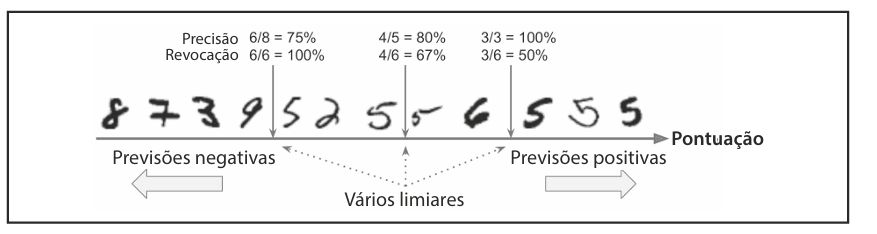

A imagem aponta a relação entre acuracia e revogação com alguns limiares. Observe que eles sao contraditorios, alta precisao leva a baixa revogação e vise versa

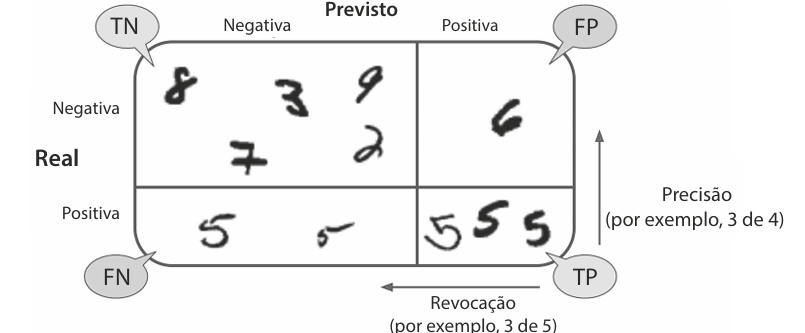

In [30]:
# Pontuação, limiar, escolhido para o digito pesquisado
y_scores = sgd_clf.decision_function([some_digit])
y_scores

array([-1714.40768101])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [32]:
threshold = 3000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [33]:
# Pedimos para o cross retornar os limiares ao inves das predições
y_scores = cross_val_predict(sgd_clf, X_train, Y_train_5, cv=5, method='decision_function')
y_scores

array([-8281.20047381, -7637.89801124, -4871.58220847, ...,
       -3914.63766967, -2864.22699887, 11885.31874834], shape=(60000,))

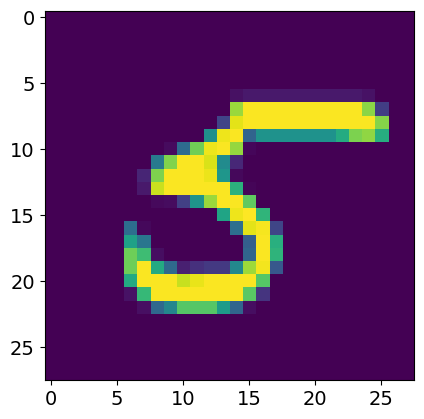

In [34]:
image = X_train[-1].reshape(28,28)
plt.imshow(image)

In [35]:
from sklearn.metrics import precision_recall_curve
precisions, recalls, thresholds = precision_recall_curve(Y_train_5, y_scores)

In [36]:
thresholds

array([-97817.05755041, -91987.74651954, -90357.03195785, ...,
        22079.78583885,  22345.73610699,  26007.51627852], shape=(60000,))

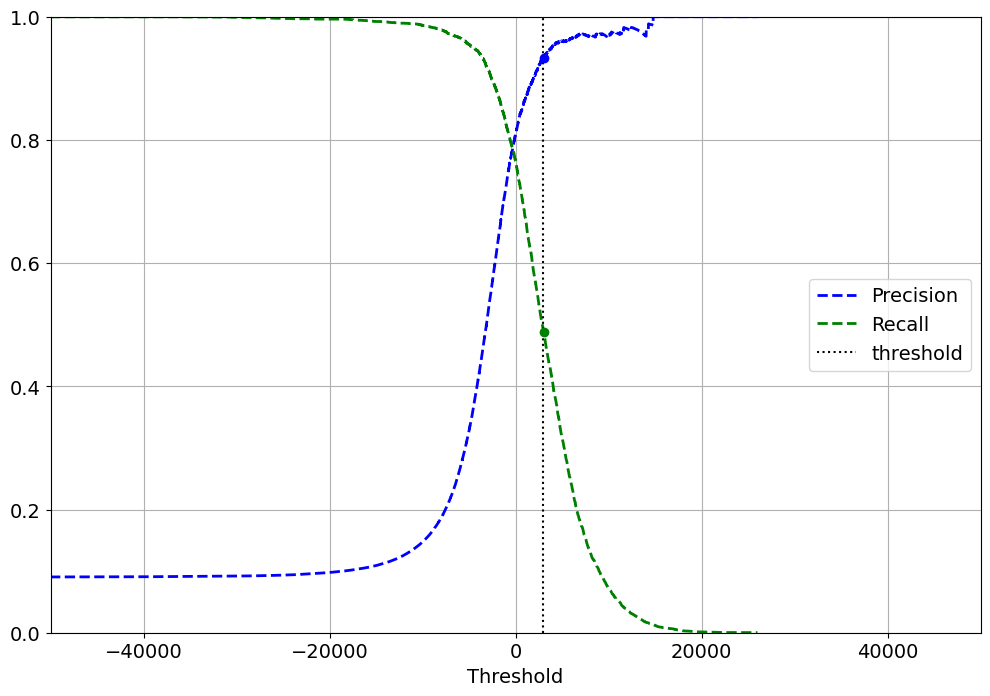

In [37]:
plt.figure(figsize=(12,8))

# Os arrays precisions e recalls possuem tamanhos diferentes, possuem um elemento a mais devido ao retorno de precisio_recall_curve

plt.plot(thresholds, precisions[:-1], "b--", label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label='Recall', linewidth=2)
plt.vlines(threshold, 0, 1.0, "k", "dotted", label="threshold")

idx = (thresholds >= threshold).argmax()  # first index ≥ threshold
plt.plot(thresholds[idx], precisions[idx], "bo")
plt.plot(thresholds[idx], recalls[idx], "go")
plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

In [38]:
a = [1,2,3,4,5,6,7,8,9]
a[:-1]

[1, 2, 3, 4, 5, 6, 7, 8]

A precisao despenca com a medida que a revogação aumenta

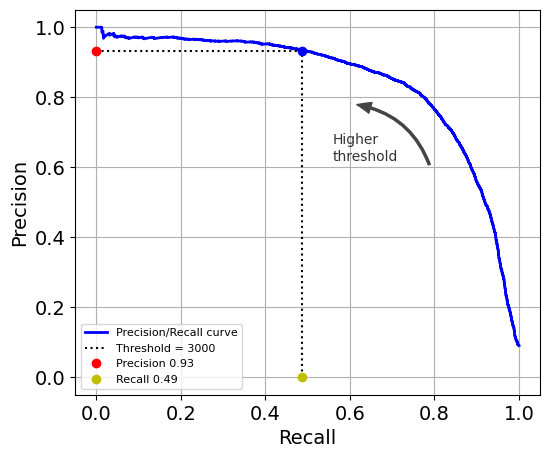

In [39]:
import matplotlib.patches as patches

plt.figure(figsize=(6,5))
plt.plot(recalls,precisions, "b", label="Precision/Recall curve", linewidth=2)

idx = (thresholds >= threshold).argmax()

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0,recalls[idx]],[precisions[idx],precisions[idx]], "k:", label="Threshold = 3000")

plt.plot(recalls[idx], precisions[idx], 'bo')
plt.plot(0, precisions[idx], 'ro', label=f'Precision {precisions[idx].round(2)}')
plt.plot(recalls[idx], 0, 'yo', label=f'Recall {recalls[idx].round(2)}')

plt.gca().add_patch(patches.FancyArrowPatch(
    (0.79, 0.60), (0.61, 0.78),
    connectionstyle="arc3,rad=.3",
    arrowstyle="Simple, tail_width=1.5, head_width=8, head_length=10",
    color="#444444"))

plt.text(0.56, 0.62, "Higher\nthreshold", color="#333333", fontsize=10)

plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="lower left", fontsize=8)
plt.show()

Para aumentar a precisao escolhemos os resultados com altos Scores:

In [40]:
idx = (precisions >= 0.9).argmax()

In [41]:
idx

np.int64(56450)

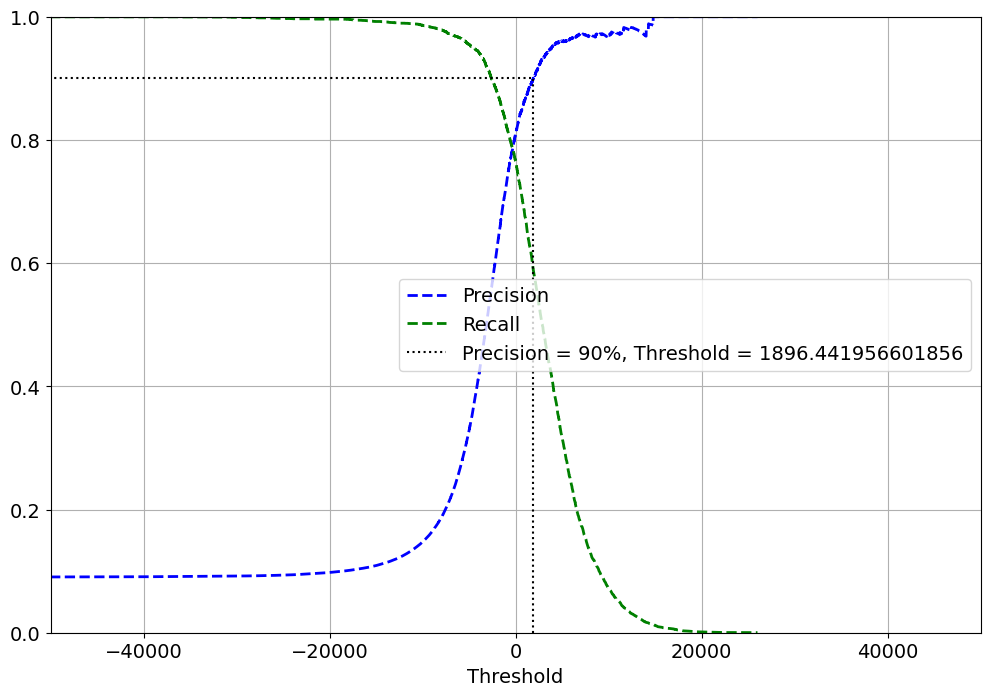

In [42]:
plt.figure(figsize=(12,8))

# Os arrays precisions e recalls possuem tamanhos diferentes, possuem um elemento a mais devido ao retorno de precisio_recall_curve

plt.plot(thresholds, precisions[:-1], "b--", label='Precision', linewidth=2)
plt.plot(thresholds, recalls[:-1], "g--", label='Recall', linewidth=2)

idx = (precisions >= 0.9).argmax()  # first index ≥ threshold
plt.plot([thresholds[idx],thresholds[idx]], [0,0.9], "k:", label=f'Precision = 90%, Threshold = {thresholds[idx]}')
plt.plot([thresholds[0],thresholds[idx]], [0.9,0.9], "k:")

plt.axis([-50000, 50000, 0, 1])
plt.grid()
plt.xlabel("Threshold")
plt.legend(loc="center right")

plt.show()

In [43]:
y_train_pred_90 = (y_scores > thresholds[idx])
y_train_pred_90

array([False, False, False, ..., False, False,  True], shape=(60000,))

In [44]:
from sklearn.metrics import precision_score, recall_score

# Acuracia: 3834/(3834 + 910)
print(precision_score(Y_train_5, y_train_pred_90))
# Apenas 80% dos positivos sao de fato o valo 5

# Revocação: 3834/(3834 + 1587)
print(recall_score(Y_train_5, y_train_pred_90))
# O modelo identificou 70% dos valores 5

0.8999718230487461
0.5891901863124884


In [45]:
recall_at_90_precision = recall_score(Y_train_5, y_train_pred_90)
recall_at_90_precision

0.5891901863124884

Com alta precisao observa-se que cerca de 33% dos valores de interesse passam batido, metrica nao muito boa dependendo do problema

# Curva ROC (Receiver Operating Characteristic)

A **Curva ROC** é uma ferramenta para avaliar o desempenho de classificadores binários, mostrando a relação entre **taxa de verdadeiros positivos (TPR)** e **taxa de falsos positivos (FPR)** em diferentes limiares de decisão.

---

## Conceitos principais

- **TPR (True Positive Rate ou Recall / Sensibilidade)**  
  Mede a proporção de positivos corretamente identificados.  
  $$
  TPR = \frac{TP}{TP + FN}
  $$

- **FPR (False Positive Rate)**  
  Mede a proporção de negativos incorretamente classificados como positivos.  
  $$
  FPR = \frac{FP}{FP + TN}
  $$

---

## Como a curva é construída

1. O modelo gera **scores de decisão** ou **probabilidades**.  
2. Para diferentes **limiares (thresholds)**, calcula-se:  
   - O **TPR** (no eixo Y).  
   - O **FPR** (no eixo X).  
3. Cada par `(FPR, TPR)` gera um ponto na curva.  
4. A curva ROC conecta esses pontos, variando do limiar mais alto ao mais baixo.

---

## Interpretação

- **Curva próxima ao canto superior esquerdo** → modelo bom (alta taxa de verdadeiros positivos e baixa taxa de falsos positivos).  
- **Linha diagonal (de (0,0) até (1,1))** → modelo aleatório (sem poder de classificação).  
- Quanto mais a curva se afasta da diagonal em direção ao canto superior esquerdo, **melhor o desempenho do classificador**.

---

## Métrica associada: AUC (Area Under the Curve)

- O valor **AUC** resume a curva ROC em um único número.  
- Interpretação:  
  - **AUC = 1.0** → classificador perfeito.  
  - **AUC = 0.5** → classificador aleatório.  
  - **AUC < 0.5** → pior que aleatório.

---


In [46]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(Y_train_5, y_scores)

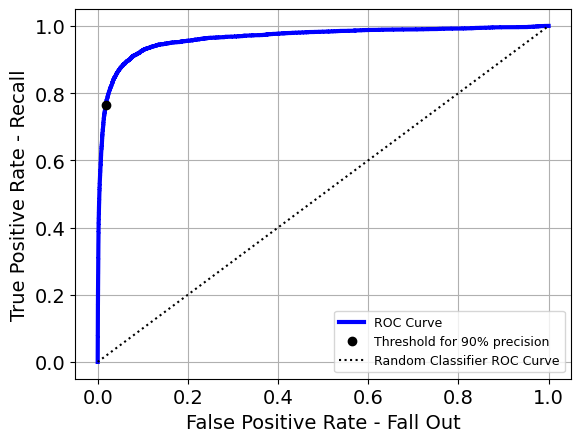

In [47]:
idx_for_90 = (thresholds <= recall_at_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_90], fpr[idx_for_90]
plt.plot(fpr, tpr, 'b', linewidth=3, label='ROC Curve')
plt.ylabel('True Positive Rate - Recall')
plt.xlabel('False Positive Rate - Fall Out')

plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.plot([0,1], [0,1], "k:", label="Random Classifier ROC Curve")
plt.legend(loc="lower right", fontsize=9)
plt.grid()
plt.show()

# ROC AUC (Área sob a curva ROC)

A métrica **ROC AUC** (Area Under the ROC Curve) resume o desempenho de um classificador binário em um único número, medindo a **área sob a curva ROC**.

---

## Intuição

- A curva ROC mostra a relação entre:
  - **TPR (Taxa de Verdadeiros Positivos / Recall)**
  - **FPR (Taxa de Falsos Positivos)**
- O **AUC** mede a área abaixo dessa curva.

---

## Interpretação do valor AUC

- **AUC = 1.0** → Classificador perfeito.  
- **AUC = 0.5** → Classificador aleatório (sem capacidade de classificação).  
- **AUC < 0.5** → Classificador pior que o acaso (inverte as classes).

> Quanto maior o AUC, melhor a capacidade do modelo de separar a classe positiva da negativa.

---

## Vantagens do ROC AUC

- **Independe de um threshold específico** → avalia o modelo globalmente.  
- **Bom para comparar modelos**: dois classificadores podem ter recalls ou precisões diferentes em certos limiares, mas o AUC mostra qual é globalmente melhor.  
- **Robusto em datasets desbalanceados** (melhor que a acurácia simples).

---

In [48]:
from sklearn.metrics import roc_auc_score
roc_auc_score(Y_train_5, y_scores)

0.9644126886314667

In [49]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(random_state=42)

In [50]:
y_probas_forest = cross_val_predict(forest_clf, X_train, Y_train_5, cv=3,
                                    method="predict_proba")

In [51]:
y_probas_forest[55001]

array([0.42, 0.58])

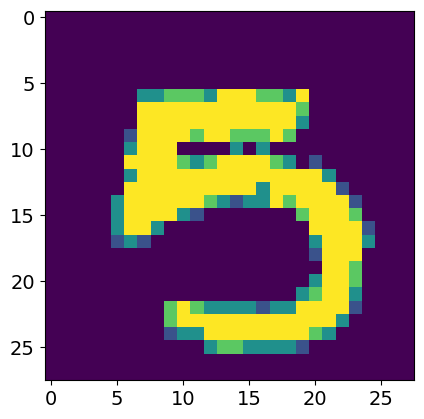

In [52]:
plt.imshow(X_train[55001].reshape(28,28))

In [53]:
y_probas_forest[55000:55010]

array([[1.  , 0.  ],
       [0.42, 0.58],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [1.  , 0.  ],
       [0.99, 0.01],
       [0.99, 0.01],
       [1.  , 0.  ],
       [1.  , 0.  ]])

In [54]:
#Selecionando as prob de ser 5
#Aplicando uma mascara em um vetor numpy
lim_inf = .5
lim_sup = .6
idx_50_to_60 = (y_probas_forest[:,1] >= lim_inf) & (y_probas_forest[:,1] <= lim_sup)
print(f'A quantidade de amostras com porcentagens de {lim_inf*100}% a {lim_sup*100}% de serem 5 é de: {idx_50_to_60.sum()}')
print(f'A porcentagem de acerto foi de {Y_train_5[idx_50_to_60].sum() / idx_50_to_60.sum()*100:.4}%')
print(f'Quantidade de acertos: {Y_train_5[idx_50_to_60].sum()}')
print(f'Quantidade de erros: {len(Y_train_5[idx_50_to_60]) - Y_train_5[idx_50_to_60].sum() }')

A quantidade de amostras com porcentagens de 50.0% a 60.0% de serem 5 é de: 441
A porcentagem de acerto foi de 94.1%
Quantidade de acertos: 415
Quantidade de erros: 26


O modelo RandomForestClassification retorna as probabilidades das instancias serem ou nao cinco. O codigo a cima Y_train_5[idx_50_to_60] retorna as instancias que o modelo jugou com 50% a 60% de chance de ser 5. E dessa porcentagem, 91% eram de fato 5

In [55]:
y_pred_true = y_probas_forest[:,1]

In [56]:
from sklearn.metrics import roc_curve

fpr_forest, tpr_forest, thresholds_forest = roc_curve(Y_train_5, y_pred_true)

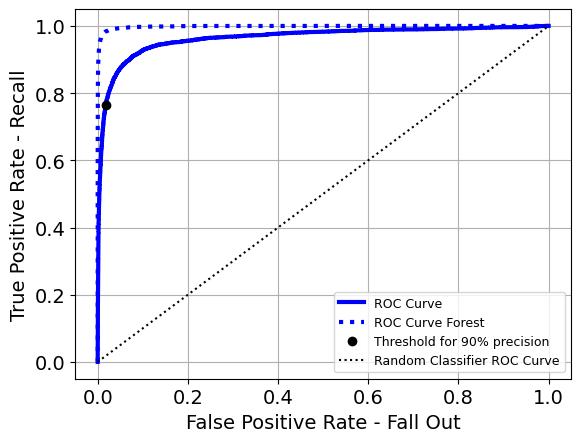

In [57]:
idx_for_90 = (thresholds <= recall_at_90_precision).argmax()
tpr_90, fpr_90 = tpr[idx_for_90], fpr[idx_for_90]
plt.plot(fpr, tpr, 'b', linewidth=3, label='ROC Curve')
plt.plot(fpr_forest, tpr_forest, 'b:', linewidth=3, label='ROC Curve Forest')
plt.ylabel('True Positive Rate - Recall')
plt.xlabel('False Positive Rate - Fall Out')

plt.plot([fpr_90], [tpr_90], "ko", label="Threshold for 90% precision")
plt.plot([0,1], [0,1], "k:", label="Random Classifier ROC Curve")
plt.legend(loc="lower right", fontsize=9)
plt.grid()
plt.show()

__Melhor Resultado__

O algoritmo da Random Forest possui melhor Recall com Menor FPR

In [58]:
from sklearn.metrics import precision_recall_curve
precisions_forest, recalls_forest, thresholds_forest = precision_recall_curve(Y_train_5, y_pred_true)

In [59]:
threshold_sgd = 1000
threshold = 0.5

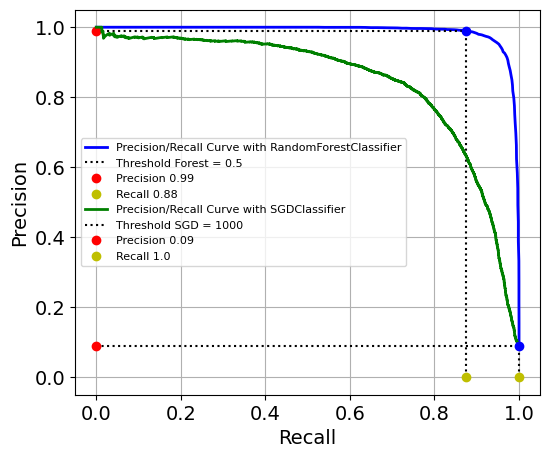

In [60]:

plt.figure(figsize=(6,5))
plt.plot(recalls_forest,precisions_forest, "b", label="Precision/Recall Curve with RandomForestClassifier", linewidth=2)

idx_forest = (thresholds_forest >= threshold).argmax()

plt.plot([recalls_forest[idx_forest], recalls_forest[idx_forest]], [0., precisions_forest[idx_forest]], "k:")
plt.plot([0,recalls_forest[idx_forest]],[precisions_forest[idx_forest],precisions_forest[idx_forest]], "k:", label=f"Threshold Forest = {threshold}")

plt.plot(recalls_forest[idx_forest], precisions_forest[idx_forest], 'bo')
plt.plot(0, precisions_forest[idx_forest], 'ro', label=f'Precision {precisions_forest[idx_forest].round(2)}')
plt.plot(recalls_forest[idx_forest], 0, 'yo', label=f'Recall {recalls_forest[idx_forest].round(2)}')

# __________________________________________________________________________________________________

plt.plot(recalls,precisions, "g", label="Precision/Recall Curve with SGDClassifier", linewidth=2)

idx = (thresholds >= threshold_sgd).argmax()

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0,recalls[idx]],[precisions[idx],precisions[idx]], "k:", label=f"Threshold SGD = {threshold_sgd}")

plt.plot(recalls[idx], precisions[idx], 'bo')
plt.plot(0, precisions[idx], 'ro', label=f'Precision {precisions[idx].round(2)}')
plt.plot(recalls[idx], 0, 'yo', label=f'Recall {recalls[idx].round(2)}')

plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="center left", fontsize=8)
plt.show()

### Comparação prática

| Algoritmo       | Vantagens 🚀 | Desvantagens ⏳ |
|-----------------|--------------|-----------------|
| **SGDClassifier** | - Muito **rápido** <br> - Escalável para datasets grandes <br> - Adequado para problemas **lineares** | - Capacidade limitada para capturar padrões complexos <br> - Geralmente **menos preciso** |
| **RandomForest**  | - Captura relações **não lineares** <br> - Considera interações entre features <br> - Geralmente **mais preciso** | - **Mais lento** no treino <br> - Requer mais memória <br> - Predição mais pesada |


In [61]:
forest_clf = RandomForestClassifier(random_state=42, max_depth=9)
y_little_forest = cross_val_predict(forest_clf, X_train, Y_train_5, cv=3, method="predict_proba")
y_pred_test_scores = y_little_forest[:,1]

In [62]:
precisions_, recalls_, thresholds_ = precision_recall_curve(Y_train_5, y_pred_test_scores)

In [63]:
threshold_ = .5

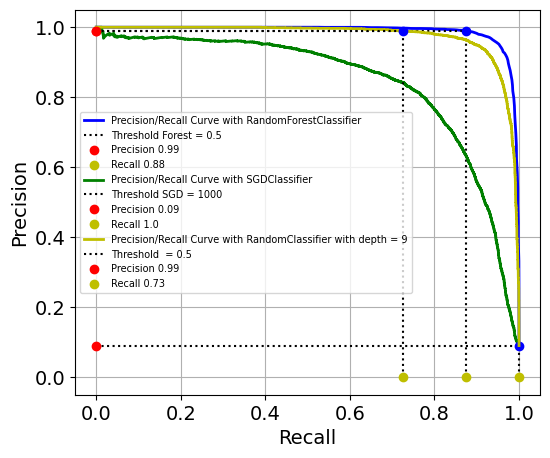

In [64]:

plt.figure(figsize=(6,5))
plt.plot(recalls_forest,precisions_forest, "b", label="Precision/Recall Curve with RandomForestClassifier", linewidth=2)

idx_forest = (thresholds_forest >= threshold).argmax()

plt.plot([recalls_forest[idx_forest], recalls_forest[idx_forest]], [0., precisions_forest[idx_forest]], "k:")
plt.plot([0,recalls_forest[idx_forest]],[precisions_forest[idx_forest],precisions_forest[idx_forest]], "k:", label=f"Threshold Forest = {threshold}")

plt.plot(recalls_forest[idx_forest], precisions_forest[idx_forest], 'bo')
plt.plot(0, precisions_forest[idx_forest], 'ro', label=f'Precision {precisions_forest[idx_forest].round(2)}')
plt.plot(recalls_forest[idx_forest], 0, 'yo', label=f'Recall {recalls_forest[idx_forest].round(2)}')

# __________________________________________________________________________________________________

plt.plot(recalls,precisions, "g", label="Precision/Recall Curve with SGDClassifier", linewidth=2)

idx = (thresholds >= threshold_sgd).argmax()

plt.plot([recalls[idx], recalls[idx]], [0., precisions[idx]], "k:")
plt.plot([0,recalls[idx]],[precisions[idx],precisions[idx]], "k:", label=f"Threshold SGD = {threshold_sgd}")

plt.plot(recalls[idx], precisions[idx], 'bo')
plt.plot(0, precisions[idx], 'ro', label=f'Precision {precisions[idx].round(2)}')
plt.plot(recalls[idx], 0, 'yo', label=f'Recall {recalls[idx].round(2)}')

# _______________________________________________________________________________________________________

plt.plot(recalls_,precisions_, "y", label="Precision/Recall Curve with RandomClassifier with depth = 9", linewidth=2)

idx_ = (thresholds_ >= threshold_).argmax()

plt.plot([recalls_[idx_], recalls_[idx_]], [0., precisions_[idx_]], "k:")
plt.plot([0,recalls_[idx_]],[precisions_[idx_],precisions_[idx_]], "k:", label=f"Threshold  = {threshold}")

plt.plot(recalls_[idx_], precisions_[idx_], 'bo')
plt.plot(0, precisions_[idx_], 'ro', label=f'Precision {precisions_[idx_].round(2)}')
plt.plot(recalls_[idx_], 0, 'yo', label=f'Recall {recalls_[idx_].round(2)}')


plt.grid()
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.legend(loc="center left", fontsize=7)
plt.show()

# 🧠 Função de Perda Logarítmica (Log Loss) e Entropia na Classificação de Dados

## 🎯 Introdução

A **função de perda logarítmica**, também chamada de **Log Loss** ou **Binary Cross-Entropy**, é uma das métricas mais utilizadas para **avaliar modelos de classificação probabilística** — especialmente em problemas **binários (0 ou 1)**.

Diferente de métricas simples como *acurácia*, que apenas dizem se o modelo acertou ou errou, o **log loss mede a confiança das previsões probabilísticas**.  
Ou seja, ele **penaliza fortemente previsões erradas com alta confiança**.

---

## 🧮 Definição Matemática

Para um conjunto de amostras $ N $, com rótulos verdadeiros $ y_i \in \{0,1\} $ e probabilidades previstas $ hat{y_i} $ para a classe **1**, a função log loss é definida como:

$$
\text{LogLoss} = -\frac{1}{N} \sum_{i=1}^{N} \Big[ y_i \log(\hat{y_i}) + (1 - y_i)\log(1 - \hat{y_i}) \Big]
$$

### 📘 Interpretação dos termos:
- $ \hat{y_i} $ → probabilidade prevista da **classe 1**
- $ 1 - \hat{y_i} $ → probabilidade prevista da **classe 0**
- $ y_i \log(\hat{y_i}) $ → mede o quanto o modelo **acertou quando o rótulo é 1**
- $ (1 - y_i)\log(1 - \hat{y_i}) $ → mede o quanto o modelo **acertou quando o rótulo é 0**

O sinal negativo (−) garante que a **perda seja positiva**, já que logaritmos de números entre 0 e 1 são negativos.

---

## 🧩 Exemplo Intuitivo

| Classe real (y) | Probabilidade prevista $(\hat{y}$) | Log Loss parcial | Interpretação |
|------------------|----------------------------------------|------------------|----------------|
| 1 | 0.9 | −log(0.9)=0.105 | O modelo acertou com confiança alta (baixa perda) |
| 1 | 0.2 | −log(0.2)=1.609 | O modelo errou com confiança (grande penalização) |
| 0 | 0.1 | −log(1−0.1)=0.105 | Acertou com confiança (baixa perda) |
| 0 | 0.9 | −log(1−0.9)=2.302 | Errou com alta confiança (alta penalização) |

---

## 📊 Importância na Classificação

A função **Log Loss** é crucial quando queremos que o modelo:
1. **Aprenda probabilidades bem calibradas**, e não apenas classificações 0/1.
2. Seja **penalizado proporcionalmente à sua confiança** nas previsões erradas.
3. Possa **expressar incerteza** — prever 0.6 em vez de 1.0 é menos arriscado se o dado é ambíguo.

Dessa forma, o Log Loss **encoraja o modelo a ser honesto** sobre suas incertezas, levando a previsões probabilísticas mais confiáveis.

---

## 🧠 Conexão com a Teoria da Informação

O Log Loss está intimamente ligado ao conceito de **Entropia** proposto por **Claude Shannon (1948)**, na teoria da informação.

A **entropia** mede a **quantidade média de incerteza (ou surpresa)** associada a um conjunto de eventos:

$$
H(p) = -\sum_{i} p_i \log(p_i)
$$

- Se todos os eventos são igualmente prováveis, a entropia é **alta** (máxima incerteza).
- Se um evento tem probabilidade próxima de 1, a entropia é **baixa** (baixa incerteza).

Na classificação, o **Log Loss** pode ser visto como a **entropia cruzada (cross-entropy)** entre as distribuições:
- A distribuição **real** $ y $
- A distribuição **prevista** $ \hat{y} $

$$
H(y, \hat{y}) = -\sum_{i} y_i \log(\hat{y_i})
$$

Assim, minimizar o Log Loss é equivalente a **minimizar a entropia cruzada** — ou seja, **fazer com que a distribuição prevista se aproxime da verdadeira**.

---

## ⚙️ Em termos práticos

No treinamento de modelos de classificação (como regressão logística, redes neurais e modelos de gradient boosting), o **Log Loss é usado como função de custo (função de perda)**.  
O objetivo do modelo é encontrar os parâmetros que **minimizam o Log Loss**, tornando as previsões mais próximas da realidade.

---

## ✅ Resumo

| Conceito | Significado |
|-----------|--------------|
| **Log Loss** | Mede o erro entre probabilidades previstas e reais |
| **Entropia** | Mede a incerteza de uma distribuição de probabilidades |
| **Entropia Cruzada** | Mede a distância entre a distribuição real e a prevista |
| **Importância** | Penaliza previsões erradas com alta confiança, incentivando previsões probabilísticas calibradas |

---

> 💡 **Em outras palavras:**  
> O Log Loss combina **probabilidade, incerteza e aprendizado** — é a ponte entre a estatística clássica, a teoria da informação e o aprendizado de máquina moderno.


### Exemplo de um modelo de classificação binaria

O modelo busca seperar os pontos em classe Verde e Vermelha. Um modelo matematico de $sigmoid$ é utilizado para gerar as probabilidades de cada classe:
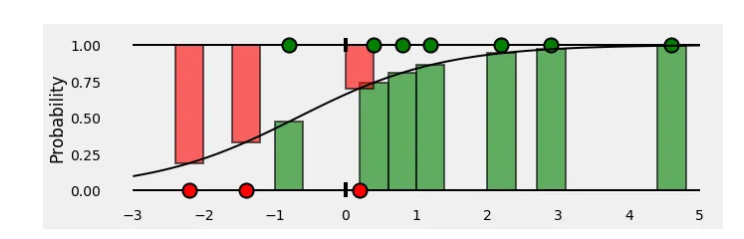

As probabilidades associadas sao:

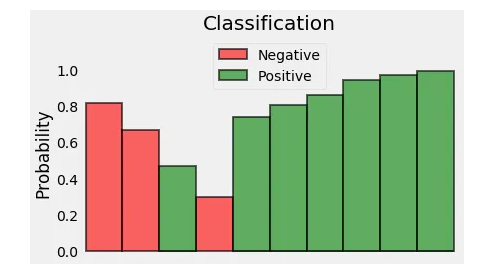

A função de penalização __log loss__ preve que se o modelo gera uma baixa probabilidade para a verdadeira classe entao a penalização é alta. A curva -log(p) por p é apresentada:

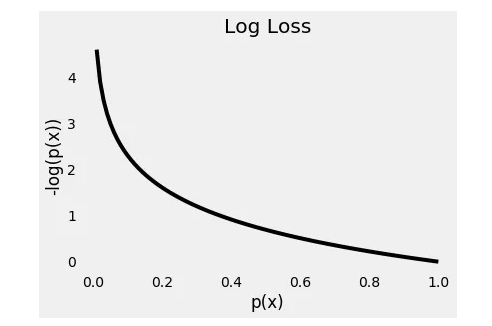

A seguir é mostrada a penalização que cada amostra gerou, baixa probabilidade alta penalização:

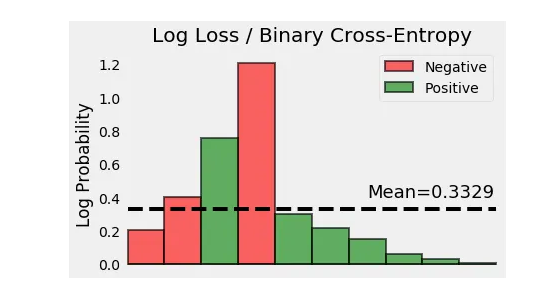

Artigo usado : https://medium.com/ensina-ai/uma-explica%C3%A7%C3%A3o-visual-para-fun%C3%A7%C3%A3o-de-custo-binary-cross-entropy-ou-log-loss-eaee662c396c

In [65]:
p = [[.8,0], [.7,0], [.5,1], [.3,0], [.75,1], [.8,1], [.85,1], [.95,1], [.98,1], [.99,1]]

In [66]:
import math
log_loss = [-(y*math.log(x) + (1-y)*math.log(x) ) for (x,y) in p]

In [67]:
len(log_loss)

10

In [68]:
entropia = sum(log_loss)/len(log_loss)

In [69]:
entropia

0.32318293709611606

### Classificação Multiclasse

#### OvA - One versus All

É uma estrategia baseado em treinar um algoritmos binarios para detectar somente uma classe. Isso precisaria de N algoritmos para N classes

#### OvO - One verus One

Treinar pares de detecção binaria: 0v1, 0v2, 0v3, ..., 9v9. Isso necessitaria diversos algoritmos (N * N-1)/2 

In [70]:
#Scikit ja detecta quando utiliza-se uma classificação com diversar classes e utiliza o OvA:

sgd_clf.fit(X_train, Y_train)

,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0
,epsilon,0.1
,n_jobs,None


In [71]:
cross_val_score(sgd_clf,X_train,Y_train,  cv=3, scoring='accuracy')

array([0.847 , 0.8584, 0.8332])

In [72]:
sgd_clf.predict([some_digit])

array(['5'], dtype='<U1')

In [73]:
sgd_clf.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype='<U1')

In [74]:
scores = sgd_clf.decision_function([some_digit])
scores

array([[-14656.54731808, -26309.92102837, -11044.29285783,
          -734.26954396, -20318.27723706,   5489.64481765,
        -23559.56669296, -13973.4436143 , -14618.75003163,
        -11695.66841804]])

In [75]:
sgd_clf.decision_function([X_train[1]])

array([[-15096.44184918,   1459.60447894,  -4060.61250212,
         -1617.37373863,  -4342.15078399,  -4817.09131449,
        -20845.93595077,   5221.18180877,  -5806.99017094,
         -6986.32494184]])

In [76]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', sgd_clf)
])
pipeline.fit(X_train, Y_train)

,steps,"[('scaler', ...), ('sgd', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15


In [77]:
cross_val_score(sgd_clf,X_train,Y_train,  cv=3, scoring='accuracy')

array([0.877 , 0.876 , 0.8708])

In [78]:
Y_train[1]

'7'

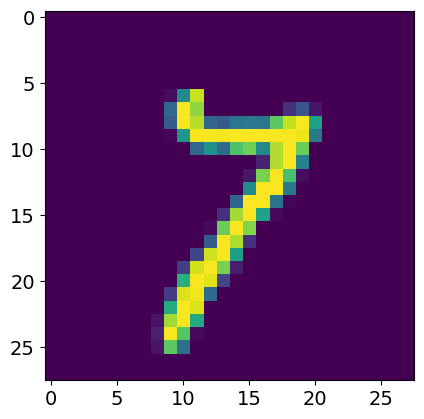

In [79]:
image = X_train[1].reshape(28,28)
plt.imshow(image)

In [80]:
from sklearn.multiclass import OneVsOneClassifier
OvO_classfier = OneVsOneClassifier(SGDClassifier(random_state = 42))

OvO_classfier.fit(X_train, Y_train)

,estimator,SGDClassifier(random_state=42)
,n_jobs,None
,loss,'hinge'
,penalty,'l2'
,alpha,0.0001
,l1_ratio,0.15
,fit_intercept,True
,max_iter,1000
,tol,0.001
,shuffle,True
,verbose,0


In [81]:
OvO_classfier.predict([X_train[1]])

array(['7'], dtype=object)

In [82]:
OvO_classfier.decision_function([X_train[1]])

array([[ 1.66666712,  7.33333298,  6.33333269,  5.33333253,  3.33331924,
         1.66666737, -0.33333323,  9.33333313,  3.33333113,  8.33333285]])

In [83]:
OvO_classfier.classes_

array(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'], dtype=object)

In [84]:
cross_val_score(OvO_classfier, X_train, Y_train, cv=3, scoring='accuracy')

array([0.9187 , 0.9166 , 0.91935])

Utilizando RandomForestClassificator

In [85]:
forest_clf.fit(X_train, Y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,9
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [86]:
forest_clf.predict_proba([X_train[1]])

array([[0.0029457 , 0.03771964, 0.05708218, 0.02141976, 0.04639312,
        0.01412001, 0.01136864, 0.71503996, 0.03923081, 0.05468019]])

In [87]:
cross_val_score(forest_clf, X_train, Y_train, cv=3,  scoring="accuracy")

array([0.93495, 0.9358 , 0.9343 ])

In [88]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('sgd', forest_clf)
])
pipeline.fit(X_train, Y_train)


,steps,"[('scaler', ...), ('sgd', ...)]"
,transform_input,None
,memory,None
,verbose,False
,copy,True
,with_mean,True
,with_std,True
,n_estimators,100
,criterion,'gini'
,max_depth,9
,min_samples_split,2


In [89]:
cross_val_score(pipeline, X_train, Y_train, cv=3,  scoring="accuracy")

array([0.93495, 0.9359 , 0.9343 ])

### __Comparação entre os Modelos__

|modelo|Score|Time|
-------|------|----|
SGD OvA|[0.887  , 0.86025, 0.88435]| 7 min
SGD OvA Escalonada|[0.87475, 0.878  , 0.87105]| 6 min
SGD OvO|[0.9179 , 0.91195, 0.9157 ]|2 min
Forest Deph 9|[0.9372 , 0.9353 , 0.93325]| 1 min
Forest Deph 9 Escalonado|[0.93715, 0.9354 , 0.9333 ]| 2 min


Utilizando o modelo forest escalonado

In [90]:
y_train_pred = cross_val_predict(pipeline, X_train, Y_train, cv=3)

In [91]:
matriz_conf = confusion_matrix( Y_train, y_train_pred)
matriz_conf

array([[5774,    2,   13,    5,    6,    5,   33,    4,   78,    3],
       [   0, 6589,   45,   22,   13,   13,    9,   19,   24,    8],
       [  34,   25, 5557,   46,   63,    4,   54,   88,   61,   26],
       [  15,   37,  124, 5567,   12,  115,   18,   65,   99,   79],
       [  15,   11,   18,    1, 5386,    1,   46,   19,   30,  315],
       [  45,   49,   15,  115,   26, 4980,   67,   10,   51,   63],
       [  36,   31,    7,    1,   24,   57, 5727,    1,   34,    0],
       [   5,   51,  108,    9,   59,    0,    0, 5807,   25,  201],
       [  15,   95,   47,  100,   43,   57,   43,    8, 5289,  154],
       [  33,   25,   27,   99,  121,   20,    7,  131,   59, 5427]])

In [92]:
222/5923

0.03748100624683438

In [93]:
222/346

0.6416184971098265

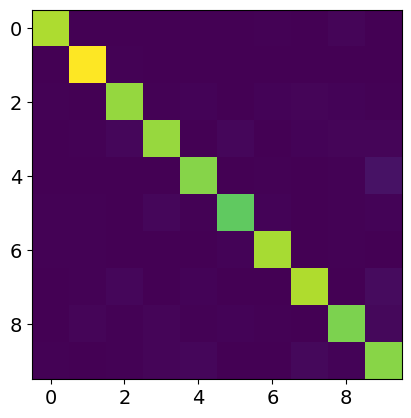

In [94]:
plt.imshow(matriz_conf)

In [95]:
rows_sum = matriz_conf.sum(axis=1,keepdims=True)
rows_sum

array([[5923],
       [6742],
       [5958],
       [6131],
       [5842],
       [5421],
       [5918],
       [6265],
       [5851],
       [5949]])

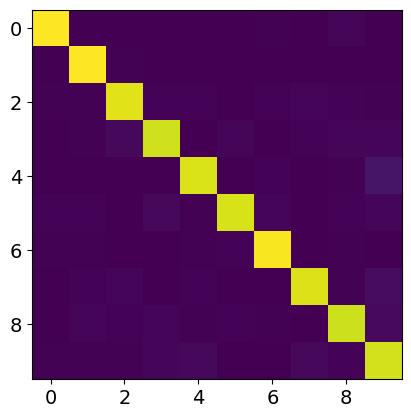

In [96]:
# Matriz normalizada
normalize_matriz_conf = matriz_conf/rows_sum
plt.imshow(normalize_matriz_conf)

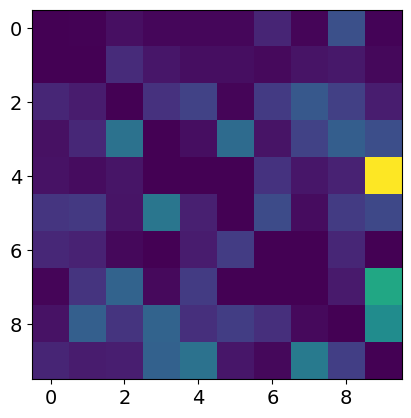

In [97]:
np.fill_diagonal(normalize_matriz_conf, 0)
plt.imshow(normalize_matriz_conf)

In [98]:
teste = matriz_conf.copy()
np.fill_diagonal(teste, 0)
teste.sum()

np.int64(3897)

In [99]:
193/5967

0.03234456175632646

#### __Plotando a Matriz de Confusao entre as predições__

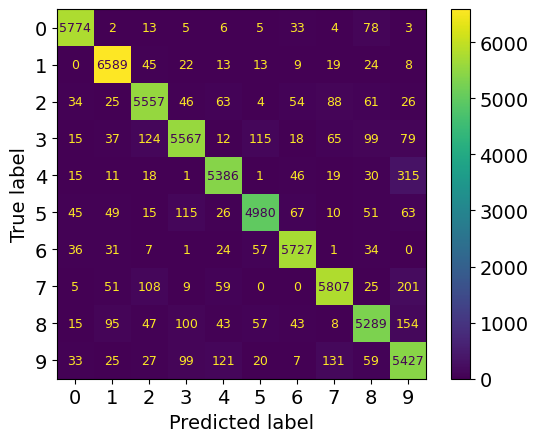

In [100]:
from sklearn.metrics import ConfusionMatrixDisplay
plt.rc('font', size=9)
ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred)
plt.show()

#### __Normalizando a matriz de predição em relação ao total de imagens de cada numero__

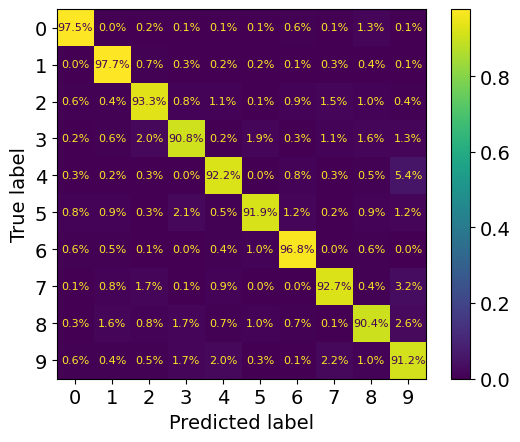

In [101]:
plt.rc('font', size=8)
ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, normalize='true', values_format=f'.1%')
plt.show()

#### __Plotando a matriz de erros__

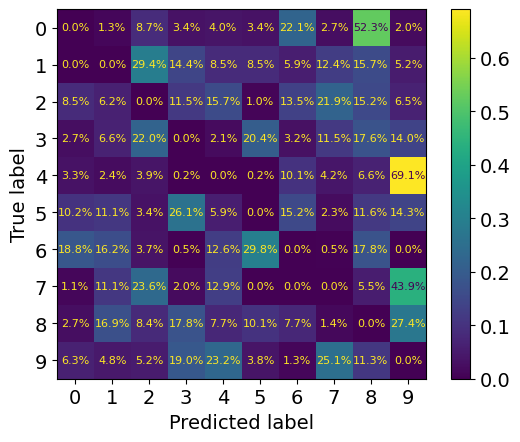

In [102]:
amostras_erradas = (y_train_pred != Y_train)# Os erros aparecem como True e terao maior peso
ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, normalize='true', values_format=f'.1%', sample_weight=amostras_erradas)
plt.show()

#### __Juntando os Graficos__


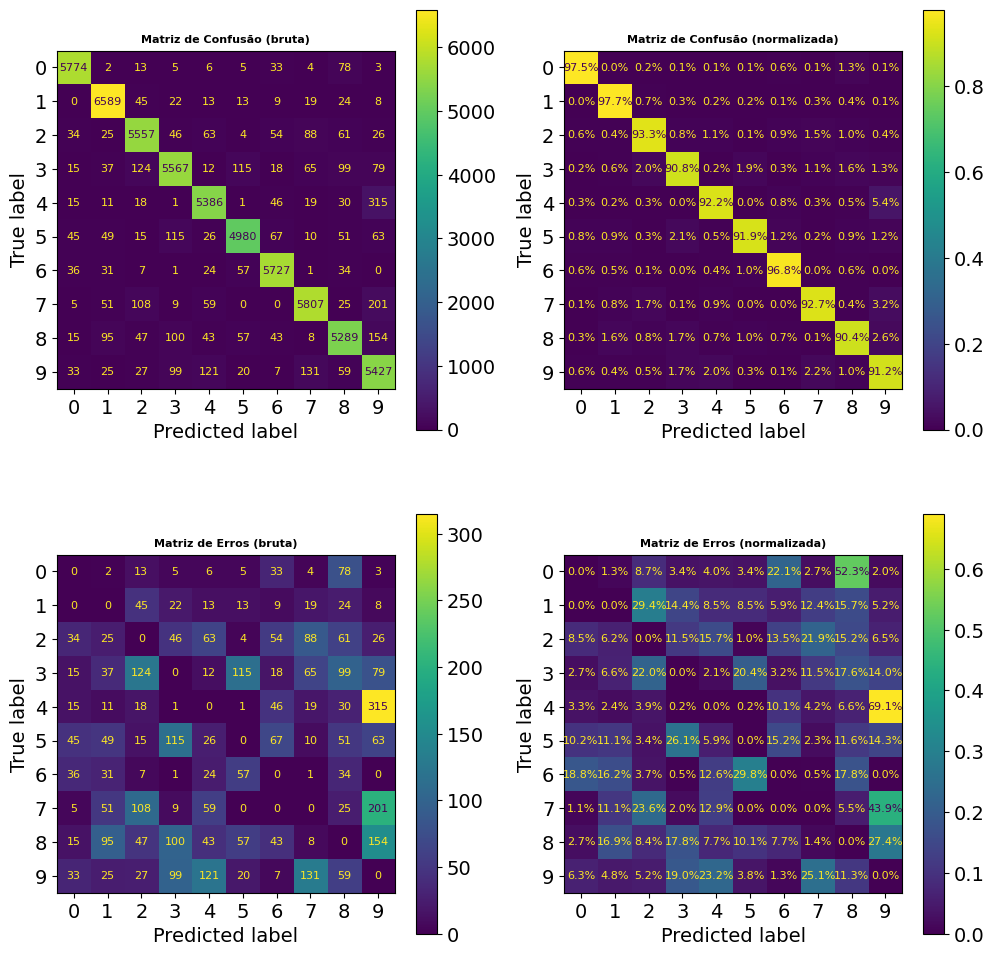

In [103]:
fig, axis = plt.subplots(nrows=2, ncols=2, figsize=(12,12))

graph1 = ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, ax=axis[0][0])
axis[0,0].set_title("Matriz de Confusão (bruta)", fontsize=8, fontweight='bold')

graph2 = ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, normalize='true', values_format=f'.1%', ax=axis[0][1])
axis[0,1].set_title("Matriz de Confusão (normalizada)", fontsize=8, fontweight='bold')
for text in graph2.text_.ravel():                 # valores dentro da matriz
    text.set_fontsize(8)

amostras_erradas = (y_train_pred != Y_train)# Os erros aparecem como True e terao maior peso
graph3 = ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, sample_weight=amostras_erradas, ax=axis[1][0])
axis[1,0].set_title("Matriz de Erros (bruta)", fontsize=8, fontweight='bold')

graph4 = ConfusionMatrixDisplay.from_predictions(Y_train, y_train_pred, normalize='true', values_format=f'.1%', ax=axis[1][1], sample_weight=amostras_erradas)
axis[1,1].set_title("Matriz de Erros (normalizada)", fontsize=8, fontweight='bold')
for text in graph4.text_.ravel():                 # valores dentro da matriz
    text.set_fontsize(8)

plt.show()